In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#read in the data
users=pd.read_csv("yammer_users.csv")
events=pd.read_csv("yammer_events.csv")
emails=pd.read_csv("yammer_emails.csv")

In [3]:
events.event_type.unique()

array(['engagement', 'signup_flow'], dtype=object)

In [4]:
events.occurred_at=pd.to_datetime(events.occurred_at)

In [5]:
#get rid of the actual times
events["date"]=pd.to_datetime(events.occurred_at.dt.date)

In [6]:
events.date[0]+pd.DateOffset(weeks=1)

Timestamp('2014-05-09 00:00:00')

In [7]:
events.date[0]

Timestamp('2014-05-02 00:00:00')

In [8]:
events.date.max()

Timestamp('2014-08-31 00:00:00')

In [9]:
events.sort_values(by="date", inplace=True)

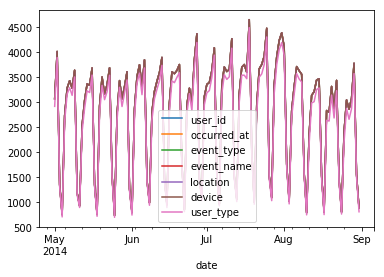

In [10]:
events.groupby("date").count().plot()

In [11]:
## SO this is all events that happen

In [12]:
dailysum=events.groupby("date").count()
dailysum=dailysum[["user_id"]]
dailysum.rename(columns={"user_id":"total_events"}, inplace=True)

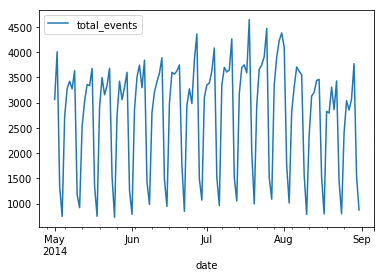

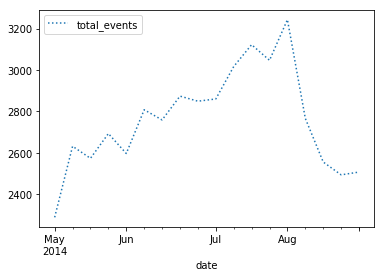

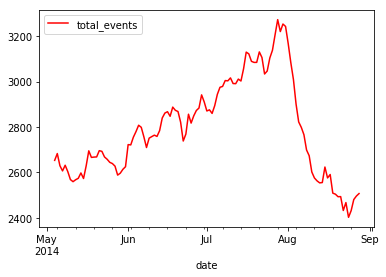

In [13]:
dailysum.plot()
dailysum.resample('W').mean().plot(style=":")
rollint=dailysum.rolling(7,center=True)
rollint.mean().plot(color='red')

In [14]:
dailysum2=events[events["event_type"] == "engagement"].groupby("date").count()
dailysum["total_engaged_events"]=dailysum2[["user_id"]]

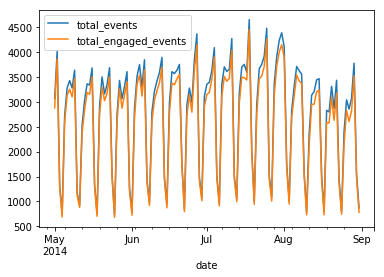

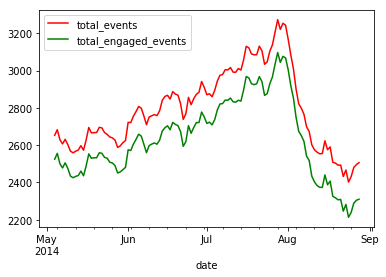

In [15]:
dailysum.plot()
#dailysum2.resample('W').mean().plot(style=":")
rolling=dailysum.rolling(7,center=True)
rolling.mean().plot(color=['red',"green"])

In [16]:
### BUt we want just number of users who engage in just 1 or more, so not number of events

In [17]:
dailysum.reset_index(inplace=True)

In [60]:
def get_engaged_users(d):
    print(d)
    print(type(d))
    try:
        #if d < dailysum.date(len(dailysum)-1):
        week=d+pd.DateOffset(weeks=1)
        print(d, week)
        print('OK NOW HERE')
        weekdata=events[(events["date"] >= d)]
        weekdata=weekdata[(weekdata["date"] <= week)]
        print(len(weekdata))
        #print(weekdata.head())
        weekusers=weekdata[weekdata["event_type"]=="engagement"]["user_id"].nunique()
        #print(weekusers)
        #dailysum["engaged_weekly_users"]=weekusers
        print('ave week users', weekusers)
        return weekusers
    except Exception as e:
        print(e)


In [63]:
dailysum["engaged_weekly_users"]=dailysum["date"].apply(lambda x: get_engaged_users(x))

2014-05-01 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2014-05-01 00:00:00 2014-05-08 00:00:00
OK NOW HERE
21838
ave week users 1156
2014-05-02 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2014-05-02 00:00:00 2014-05-09 00:00:00
OK NOW HERE
22407
ave week users 1164
2014-05-03 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2014-05-03 00:00:00 2014-05-10 00:00:00
OK NOW HERE
19580
ave week users 1107
2014-05-04 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2014-05-04 00:00:00 2014-05-11 00:00:00
OK NOW HERE
19161
ave week users 1078
2014-05-05 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2014-05-05 00:00:00 2014-05-12 00:00:00
OK NOW HERE
20943
ave week users 1153
2014-05-06 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2014-05-06 00:00:00 2014-05-13 00:00:00
OK NOW HERE
21248
ave week users 1172
2014-05-07 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2014-05-07 00:00:00 2014-05-14 00:0

ave week users 1429
2014-07-02 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2014-07-02 00:00:00 2014-07-09 00:00:00
OK NOW HERE
24208
ave week users 1451
2014-07-03 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2014-07-03 00:00:00 2014-07-10 00:00:00
OK NOW HERE
24469
ave week users 1478
2014-07-04 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2014-07-04 00:00:00 2014-07-11 00:00:00
OK NOW HERE
25110
ave week users 1480
2014-07-05 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2014-07-05 00:00:00 2014-07-12 00:00:00
OK NOW HERE
22542
ave week users 1425
2014-07-06 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2014-07-06 00:00:00 2014-07-13 00:00:00
OK NOW HERE
22070
ave week users 1384
2014-07-07 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2014-07-07 00:00:00 2014-07-14 00:00:00
OK NOW HERE
24282
ave week users 1486
2014-07-08 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2014-07-08 00:0

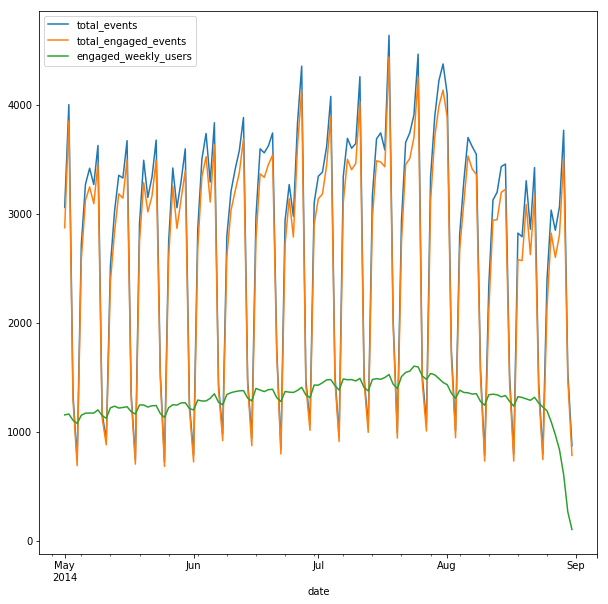

In [174]:
dailysum[["total_events","total_engaged_events","engaged_weekly_users","date"]].set_index('date').plot(figsize=(10,10))

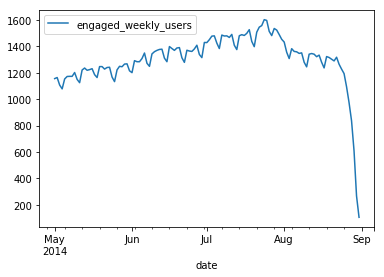

In [77]:
dailysum.plot("date","engaged_weekly_users")

In [79]:
emails["action"].unique()

array(['sent_weekly_digest', 'email_open', 'email_clickthrough',
       'sent_reengagement_email'], dtype=object)

In [102]:
events["event_name"].unique()

array(['like_message', 'view_inbox', 'home_page', 'login', 'send_message',
       'search_click_result_6', 'search_click_result_3',
       'search_click_result_1', 'search_click_result_4', 'search_run',
       'search_autocomplete', 'search_click_result_9',
       'search_click_result_5', 'search_click_result_2',
       'search_click_result_10', 'search_click_result_7',
       'search_click_result_8', 'complete_signup', 'enter_info',
       'create_user', 'enter_email'], dtype=object)

In [137]:
def get_engaged_users_specifics(d,col,choice):
    print(d)
    print(type(d))
    try:
        #if d < dailysum.date(len(dailysum)-1):
        week=d+pd.DateOffset(weeks=1)
        print(d, week)
        print('OK NOW HERE')
        weekdata=events[(events["date"] >= d)]
        weekdata=weekdata[(weekdata["date"] <= week)]
        print(len(weekdata))
        #print(weekdata.head())
        weekusers=weekdata[weekdata["event_type"]=="engagement"]
        weekusers=weekusers[weekusers[col] == choice]
        weekusers=weekusers["user_id"].nunique()
        #print(weekusers)
        #dailysum["engaged_weekly_users"]=weekusers
        print('ave week users', weekusers)
        return weekusers
    except Exception as e:
        print(e)


In [128]:
#for each event:create, completesignup, enter inbox/email = 0
dailysum["engaged_weekly_users_click1"]=dailysum[
    "date"].apply(lambda x: get_engaged_users_specifics(x,"event_name","search_click_result_1"))

2014-05-01 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2014-05-01 00:00:00 2014-05-08 00:00:00
OK NOW HERE
21838
ave week users 57
2014-05-02 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2014-05-02 00:00:00 2014-05-09 00:00:00
OK NOW HERE
22407
ave week users 58
2014-05-03 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2014-05-03 00:00:00 2014-05-10 00:00:00
OK NOW HERE
19580
ave week users 50
2014-05-04 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2014-05-04 00:00:00 2014-05-11 00:00:00
OK NOW HERE
19161
ave week users 49
2014-05-05 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2014-05-05 00:00:00 2014-05-12 00:00:00
OK NOW HERE
20943
ave week users 53
2014-05-06 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2014-05-06 00:00:00 2014-05-13 00:00:00
OK NOW HERE
21248
ave week users 53
2014-05-07 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2014-05-07 00:00:00 2014-05-14 00:00:00
OK NOW 

ave week users 65
2014-06-27 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2014-06-27 00:00:00 2014-07-04 00:00:00
OK NOW HERE
24449
ave week users 65
2014-06-28 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2014-06-28 00:00:00 2014-07-05 00:00:00
OK NOW HERE
21612
ave week users 63
2014-06-29 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2014-06-29 00:00:00 2014-07-06 00:00:00
OK NOW HERE
21084
ave week users 62
2014-06-30 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2014-06-30 00:00:00 2014-07-07 00:00:00
OK NOW HERE
23360
ave week users 67
2014-07-01 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2014-07-01 00:00:00 2014-07-08 00:00:00
OK NOW HERE
23951
ave week users 71
2014-07-02 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2014-07-02 00:00:00 2014-07-09 00:00:00
OK NOW HERE
24208
ave week users 69
2014-07-03 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2014-07-03 00:00:00 2014-07-1

In [129]:
dailysum.max()

date                           2014-08-31 00:00:00
total_events                                  4641
total_engaged_events                          4443
engaged_weekly_users                          1603
engaged_weekly_users_create                      0
engaged_weekly_users_login                    1603
engaged_weekly_users_view                     1270
engaged_weekly_users_home                     1491
engaged_weekly_users_send                     1020
engaged_weekly_users_run                       244
engaged_weekly_users_auto                      610
engaged_weekly_users_click1                     79
dtype: object

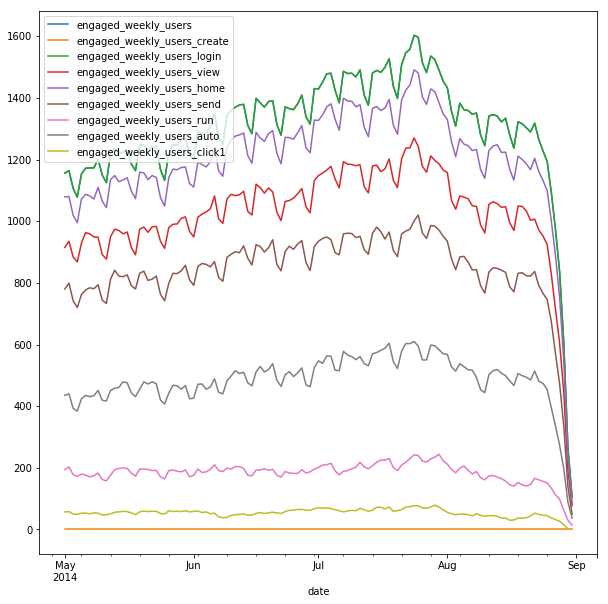

In [134]:
dailysum.drop(columns=["total_events","total_engaged_events"]).set_index('date').plot(figsize=(10,10))


In [136]:
#switched != engagement, just to see
dailysum["test"]=dailysum[
    "date"].apply(lambda x: get_engaged_users_specifics(x,"event_name","login"))

2014-05-01 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2014-05-01 00:00:00 2014-05-08 00:00:00
OK NOW HERE
21838
ave week users 0
2014-05-02 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2014-05-02 00:00:00 2014-05-09 00:00:00
OK NOW HERE
22407
ave week users 0
2014-05-03 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2014-05-03 00:00:00 2014-05-10 00:00:00
OK NOW HERE
19580
ave week users 0
2014-05-04 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2014-05-04 00:00:00 2014-05-11 00:00:00
OK NOW HERE
19161
ave week users 0
2014-05-05 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2014-05-05 00:00:00 2014-05-12 00:00:00
OK NOW HERE
20943
ave week users 0
2014-05-06 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2014-05-06 00:00:00 2014-05-13 00:00:00
OK NOW HERE
21248
ave week users 0
2014-05-07 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2014-05-07 00:00:00 2014-05-14 00:00:00
OK NOW HERE
2

25110
ave week users 0
2014-07-05 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2014-07-05 00:00:00 2014-07-12 00:00:00
OK NOW HERE
22542
ave week users 0
2014-07-06 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2014-07-06 00:00:00 2014-07-13 00:00:00
OK NOW HERE
22070
ave week users 0
2014-07-07 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2014-07-07 00:00:00 2014-07-14 00:00:00
OK NOW HERE
24282
ave week users 0
2014-07-08 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2014-07-08 00:00:00 2014-07-15 00:00:00
OK NOW HERE
24629
ave week users 0
2014-07-09 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2014-07-09 00:00:00 2014-07-16 00:00:00
OK NOW HERE
24679
ave week users 0
2014-07-10 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2014-07-10 00:00:00 2014-07-17 00:00:00
OK NOW HERE
24663
ave week users 0
2014-07-11 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2014-07-11 00:00:00 2014-07-18

In [139]:
dailysum.max()

date                           2014-08-31 00:00:00
total_events                                  4641
total_engaged_events                          4443
engaged_weekly_users                          1603
engaged_weekly_users_create                      0
engaged_weekly_users_login                    1603
engaged_weekly_users_view                     1270
engaged_weekly_users_home                     1491
engaged_weekly_users_send                     1020
engaged_weekly_users_run                       244
engaged_weekly_users_auto                      610
engaged_weekly_users_click1                     79
test                                             0
dtype: object

In [141]:
emails.occurred_at=pd.to_datetime(emails.occurred_at)

In [142]:
#get rid of the actual times
emails["date"]=pd.to_datetime(emails.occurred_at.dt.date)

In [143]:
emails

,user_id,occurred_at,action,user_type,date
0,0.0,2014-05-06 09:30:00,sent_weekly_digest,1.0,2014-05-06
1,0.0,2014-05-13 09:30:00,sent_weekly_digest,1.0,2014-05-13
2,0.0,2014-05-20 09:30:00,sent_weekly_digest,1.0,2014-05-20
3,0.0,2014-05-27 09:30:00,sent_weekly_digest,1.0,2014-05-27
4,0.0,2014-06-03 09:30:00,sent_weekly_digest,1.0,2014-06-03
5,0.0,2014-06-03 09:30:25,email_open,1.0,2014-06-03
6,0.0,2014-06-10 09:30:00,sent_weekly_digest,1.0,2014-06-10
7,0.0,2014-06-10 09:30:24,email_open,1.0,2014-06-10
8,0.0,2014-06-17 09:30:00,sent_weekly_digest,1.0,2014-06-17
9,0.0,2014-06-17 09:30:23,email_open,1.0,2014-06-17


In [144]:
emails.sort_values(by="date", inplace=True)

In [156]:
emails["action"].unique()

array(['sent_weekly_digest', 'email_open', 'email_clickthrough',
       'sent_reengagement_email'], dtype=object)

In [158]:
def get_emails(d,choice):
    print(d)
    print(type(d))
    try:
        #if d < dailysum.date(len(dailysum)-1):
        week=d+pd.DateOffset(weeks=1)
        print(d, week)
        print('OK NOW HERE')
        weekdata=emails[(emails["date"] >= d)]
        weekdata=weekdata[(weekdata["date"] <= week)]
        print(len(weekdata))
        #print(weekdata.head())
        weekusers=weekdata[weekdata["action"]==choice]
        weekusers=weekusers["user_id"].nunique()
        #print(weekusers)
        #dailysum["engaged_weekly_users"]=weekusers
        print('ave week users', weekusers)
        return weekusers
    except Exception as e:
        print(e)


In [162]:
dailysum["email_reengage"]=dailysum[
    "date"].apply(lambda x: get_emails(x,"sent_reengagement_email"))

2014-05-01 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2014-05-01 00:00:00 2014-05-08 00:00:00
OK NOW HERE
4802
ave week users 179
2014-05-02 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2014-05-02 00:00:00 2014-05-09 00:00:00
OK NOW HERE
4809
ave week users 196
2014-05-03 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2014-05-03 00:00:00 2014-05-10 00:00:00
OK NOW HERE
4174
ave week users 184
2014-05-04 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2014-05-04 00:00:00 2014-05-11 00:00:00
OK NOW HERE
4187
ave week users 189
2014-05-05 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2014-05-05 00:00:00 2014-05-12 00:00:00
OK NOW HERE
5293
ave week users 197
2014-05-06 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2014-05-06 00:00:00 2014-05-13 00:00:00
OK NOW HERE
4936
ave week users 194
2014-05-07 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2014-05-07 00:00:00 2014-05-14 00:00:00
OK NOW 

6514
ave week users 224
2014-07-18 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2014-07-18 00:00:00 2014-07-25 00:00:00
OK NOW HERE
6632
ave week users 252
2014-07-19 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2014-07-19 00:00:00 2014-07-26 00:00:00
OK NOW HERE
5729
ave week users 255
2014-07-20 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2014-07-20 00:00:00 2014-07-27 00:00:00
OK NOW HERE
5735
ave week users 259
2014-07-21 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2014-07-21 00:00:00 2014-07-28 00:00:00
OK NOW HERE
7216
ave week users 246
2014-07-22 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2014-07-22 00:00:00 2014-07-29 00:00:00
OK NOW HERE
6796
ave week users 258
2014-07-23 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2014-07-23 00:00:00 2014-07-30 00:00:00
OK NOW HERE
6731
ave week users 230
2014-07-24 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2014-07-24 00:00:00 201

In [163]:
dailysum.max()

date                           2014-08-31 00:00:00
total_events                                  4641
total_engaged_events                          4443
engaged_weekly_users                          1603
engaged_weekly_users_create                      0
engaged_weekly_users_login                    1603
engaged_weekly_users_view                     1270
engaged_weekly_users_home                     1491
engaged_weekly_users_send                     1020
engaged_weekly_users_run                       244
engaged_weekly_users_auto                      610
engaged_weekly_users_click1                     79
test                                             0
email_open                                    1702
email_click                                    761
email_digest                                  4111
email_reengage                                 311
dtype: object

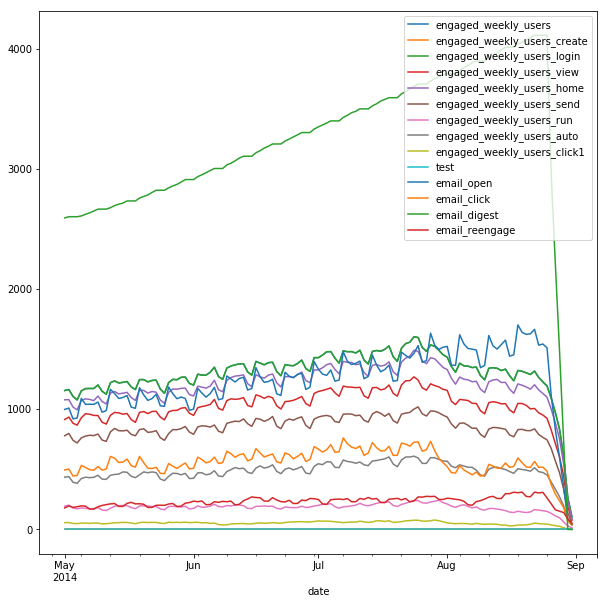

In [166]:
dailysum.drop(columns=["total_events","total_engaged_events"]).set_index('date').plot(figsize=(10,10))


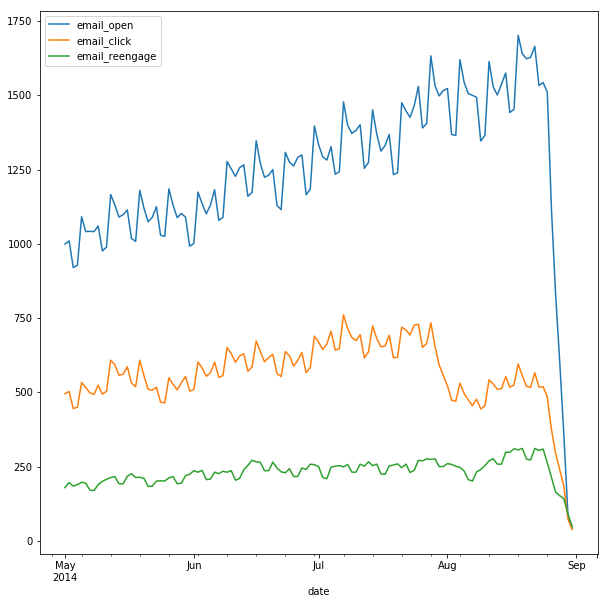

In [172]:
dailysum[["date","email_open","email_click","email_reengage"]].set_index('date').plot(figsize=(10,10))


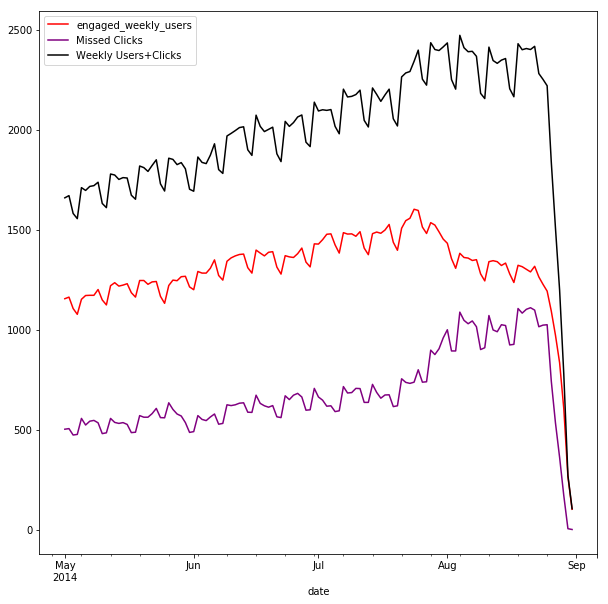

In [181]:
#dailysum.plot("date","engaged_weekly_users")
dailysum["Missed Clicks"]=dailysum["email_open"]-dailysum["email_click"]
dailysum["Weekly Users+Clicks"]=dailysum["engaged_weekly_users"]+dailysum["diff"]
dailysum[["date","engaged_weekly_users","Missed Clicks","Weekly Users+Clicks"]].set_index(
    'date').plot(figsize=(10,10),colors=["red","purple","black"])
